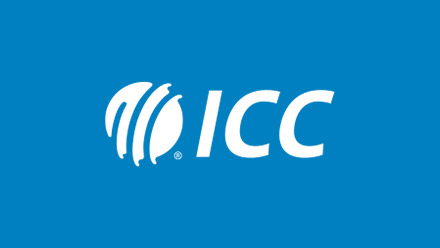

#  ICC Men's All Time Best Lineup

### Batting Records Data Cleaning 

In [1]:
# importing all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the ODI batting records 
df = pd.read_csv('ODI_batting_records_clean.csv')

In [3]:
# importing the TEST batting records
df2 = pd.read_csv('TEST_batting_records_clean.csv')

In [4]:
# merging the two format of the game 
df_merge = pd.merge(df,df2,on='name',suffixes=('_ODI', '_Test'))

In [5]:
# Calculating all the necessary fields for analysis
df_merge['Total_Matches'] = df_merge['matches_Test'] + df_merge['matches_ODI']
df_merge['Total_Runs'] = df_merge['runs_Test'] + df_merge['runs_ODI']

In [6]:
df_merge['Total_Not_Outs'] = df_merge['not_outs'] + df_merge['not_out']
df_merge['Total_Century'] = df_merge['century_Test'] + df_merge['century_ODI']

In [7]:
df_merge['Total_Half_Century'] = df_merge['half_century_Test'] + df_merge['half_century_ODI']

In [8]:
df_merge['Overall_Average'] = ((
    (df_merge['average_Test'] * df_merge['matches_Test']) +
    (df_merge['average_ODI'] * df_merge['matches_ODI'])
) / (df_merge['matches_Test'] + df_merge['matches_ODI'])).round(2)

In [9]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1192 non-null   object 
 1   span_ODI            1192 non-null   object 
 2   matches_ODI         1192 non-null   float64
 3   innings_ODI         1192 non-null   int64  
 4   not_outs            1192 non-null   int64  
 5   runs_ODI            1192 non-null   int64  
 6   highest_score_ODI   1192 non-null   int64  
 7   average_ODI         1192 non-null   float64
 8   balls_faced         1192 non-null   int64  
 9   strike_rate         1192 non-null   float64
 10  century_ODI         1192 non-null   int64  
 11  half_century_ODI    1192 non-null   int64  
 12  ducks_ODI           1192 non-null   int64  
 13  country_ODI         1192 non-null   object 
 14  span_Test           1192 non-null   object 
 15  matches_Test        1192 non-null   float64
 16  inning

In [10]:
df_merge = df_merge[['name','Total_Matches','Total_Runs','Overall_Average','Total_Not_Outs','Total_Century','Total_Half_Century','country_ODI']]

In [11]:
# renaming the columns for better readability 
df_merge_bat = df_merge.rename(columns={'name': 'Name','country_ODI': 'Country'})

In [12]:
# final dataframe for batting records for our analysis
df_merge_bat

,Name,Total_Matches,Total_Runs,Overall_Average,Total_Not_Outs,Total_Century,Total_Half_Century,Country
0,SR Tendulkar,658.0,34132,47.68,74,100,162,IND
1,KC Sangakkara,538.0,26634,45.82,58,63,145,SL
2,V Kohli,405.0,22696,56.01,55,79,102,IND
3,RT Ponting,543.0,27082,45.07,68,71,144,AUS
4,ST Jayasuriya,552.0,20363,34.01,32,42,99,SL
...,...,...,...,...,...,...,...,...
1187,MB Owens,9.0,16,2.36,6,0,0,NZ
1188,NT Pascal,3.0,12,4.00,0,0,0,WI
1189,Rafiqul Islam,2.0,7,1.75,0,0,0,BAN
1190,Shadab Kabir,8.0,148,13.21,0,0,1,PAK


### Bowling Records for Data Cleaning

In [13]:
# importing the ODI bowling records
df3 = pd.read_csv('ODI_bowling_records_clean.csv')

In [14]:
# importing the TEST bowling records
df4 = pd.read_csv('TEST_bowling_records_clean.csv')

In [15]:
# merging the two format of the game 
df_merge = pd.merge(df3,df4,on='name',suffixes=('_ODI', '_Test'))

In [16]:
# Calculating necessary fields for data analysis
df_merge['Total_Matches'] = df_merge['matches_Test'] + df_merge['matches_ODI']
df_merge['Total_Wickets'] = df_merge['wickets_Test'] + df_merge['wickets_ODI']

In [17]:
df_merge['Overall_Strike_Rate'] = (
    ((df_merge['overs_Test'])*6 + (df_merge['overs_ODI'])*6) / 
    (df_merge['wickets_Test'] + df_merge['wickets_ODI'])
)
df_merge['Overall_Strike_Rate'] = (df_merge['Overall_Strike_Rate']).round(2)

In [18]:
df_merge['Overall_Average'] = ((
    (df_merge['average_Test'] * df_merge['matches_Test']) +
    (df_merge['average_ODI'] * df_merge['matches_ODI'])
) / (df_merge['matches_Test'] + df_merge['matches_ODI'])).round(2)

In [19]:
df_merge['Total_Overs'] = df_merge['overs_Test'] + df_merge['overs_ODI']

In [20]:
df_merge['Total_Runs_Conceded'] = df_merge['runs_conceded_Test'] + df_merge['runs_conceded_ODI']

In [21]:
df_merge['Overall_Economy_Rate'] = (df_merge['Total_Runs_Conceded'] / df_merge['Total_Overs']).round(2)

In [22]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      762 non-null    object 
 1   span_ODI                  762 non-null    object 
 2   matches_ODI               762 non-null    int64  
 3   innings_ODI               762 non-null    int64  
 4   overs_ODI                 762 non-null    float64
 5   maiden_overs_ODI          762 non-null    int64  
 6   runs_conceded_ODI         762 non-null    int64  
 7   wickets_ODI               762 non-null    int64  
 8   best_bowling_figure       762 non-null    object 
 9   average_ODI               762 non-null    float64
 10  economy_rate_ODI          762 non-null    float64
 11  bowling_strike_rate_ODI   762 non-null    float64
 12  four_wickets_haul         762 non-null    int64  
 13  five_wickets_haul_ODI     762 non-null    int64  
 14  country_OD

In [23]:
df_merge_bowl = df_merge[['name','Total_Matches','Total_Overs','Total_Wickets','Overall_Average','Total_Runs_Conceded','Overall_Economy_Rate','Overall_Strike_Rate','country_ODI']]

In [24]:
# renaming the columns for better readability 
df_merge_bowl = df_merge_bowl.rename(columns={'name': 'Name','country_ODI': 'Country'})

In [25]:
# final dataframe for bowling records for our analysis
df_merge_bowl

,Name,Total_Matches,Total_Overs,Total_Wickets,Overall_Average,Total_Runs_Conceded,Overall_Economy_Rate,Overall_Strike_Rate,Country
0,M Muralidaran,483,10474.6,1334,22.98,30506,2.91,47.11,SL
1,Waqar Younis,335,4685.2,771,23.66,18159,3.88,36.46,PAK
2,WPUJC Vaas,433,6535.3,755,28.06,21515,3.29,51.94,SL
3,Shahid Afridi,425,3477.2,443,34.58,15341,4.41,47.10,PAK
4,SM Pollock,411,6676.9,814,24.13,19364,2.90,49.22,SA
...,...,...,...,...,...,...,...,...,...
757,Subashis Roy,5,134.5,10,50.33,510,3.79,80.70,BAN
758,CK Tshuma,3,36.0,2,83.67,168,4.67,108.00,ZIM
759,M Vijay,78,70.0,2,162.91,235,3.36,210.00,IND
760,B White,5,94.3,5,112.60,554,5.87,113.16,IRE


### Data Analysis ( ALL TIME BEST 11 )

##### considering only TEST and ODI records as they are known to be original format for the game of Cricket

In [26]:
# renaming the dataframes for simplicity
bat = df_merge_bat
bowl = df_merge_bowl 

In [27]:
# Top 20 batsman with most runs
runs = bat.sort_values(by='Total_Runs',ascending=False).head(20)

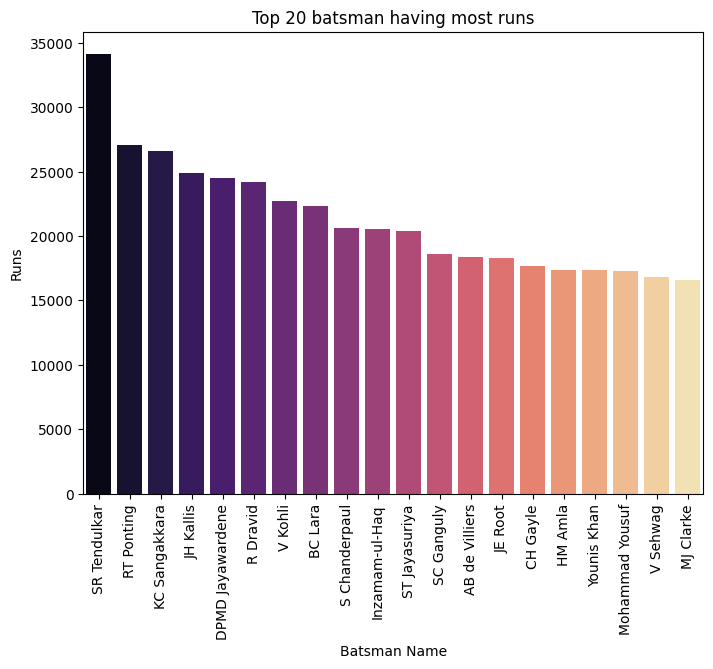

In [28]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Name', y='Total_Runs', data=runs, palette="magma")
plt.title('Top 20 batsman having most runs')
plt.xlabel('Batsman Name')
plt.ylabel('Runs')
plt.xticks(rotation=90)
plt.show()

In [29]:
# Top 20 batsman with best average having scored more than 20000 runs
average = bat[bat['Total_Runs']>20000].sort_values(by='Overall_Average',ascending=False).head(10)

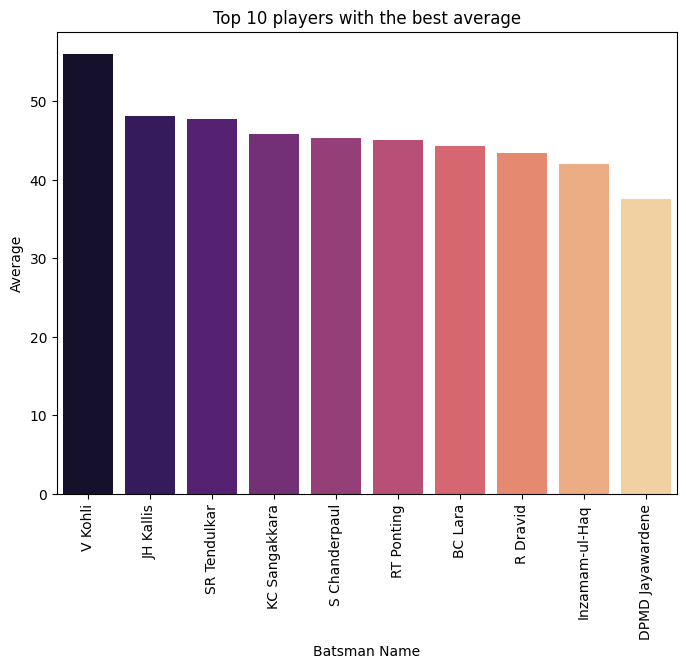

In [30]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Name', y='Overall_Average', data=average, palette="magma")
plt.title('Top 10 players with the best average')
plt.xlabel('Batsman Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Top 20 batsman with highest centuries
century = bat.sort_values(by='Total_Century',ascending=False).head(20)

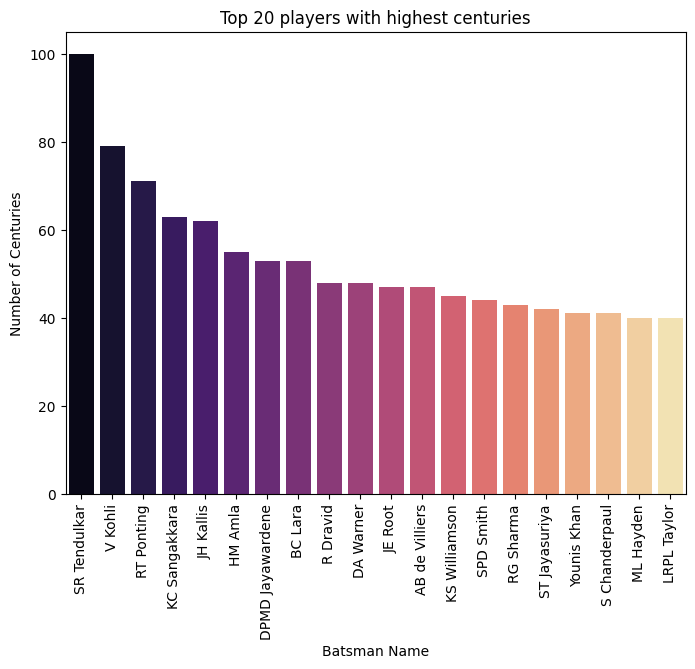

In [32]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Name', y='Total_Century', data=century, palette="magma")
plt.title('Top 20 players with highest centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Top 20 bowlers with most number of wickets
most_wicket = bowl.sort_values(by='Total_Wickets',ascending=False).head(20)

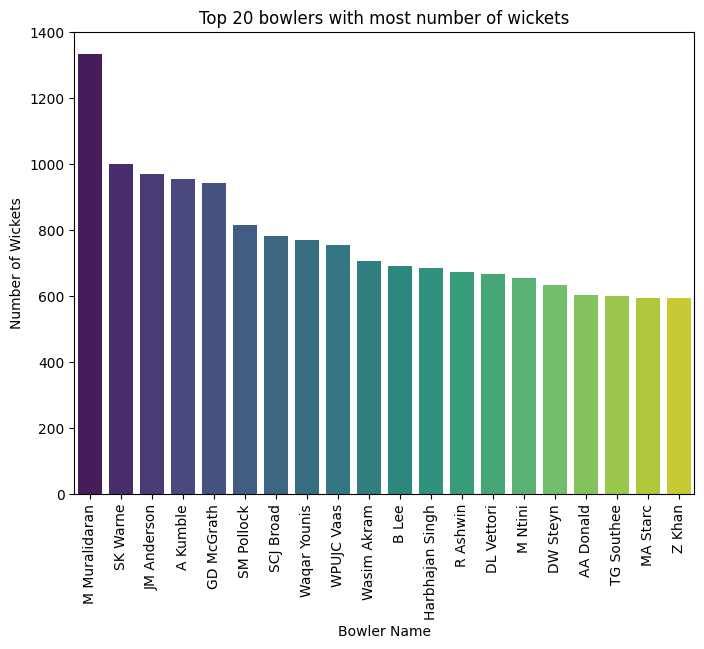

In [34]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Name', y='Total_Wickets', data = most_wicket, palette="viridis")
plt.title('Top 20 bowlers with most number of wickets')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=90)
plt.show()

In [35]:
# Top 10 bowlers with the best economy having bowled more than 5000 overs
best_eco = bowl[bowl['Total_Overs']>4000].sort_values(by='Overall_Economy_Rate',ascending=True).head(10)

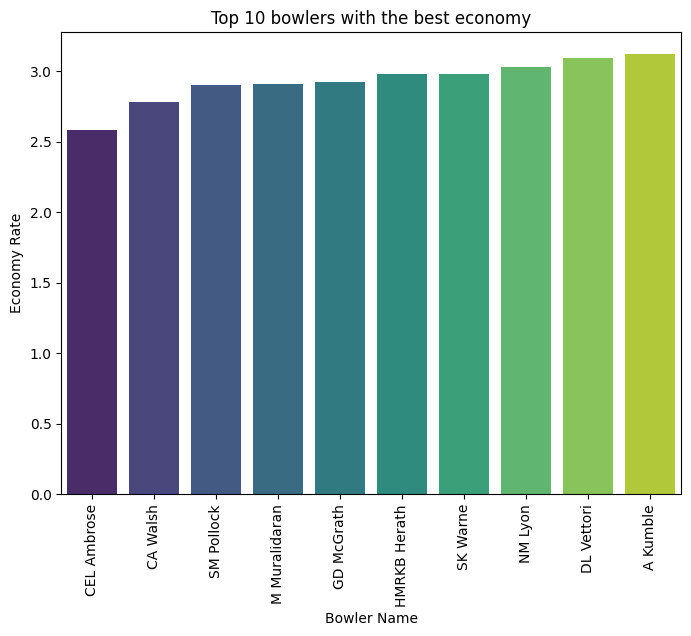

In [36]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Name', y='Overall_Economy_Rate', data = best_eco, palette="viridis")
plt.title('Top 10 bowlers with the best economy')
plt.xlabel('Bowler Name')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Top 10 bowlers with the best bowling average having bowled more than 2000 overs
best_aver = bowl[bowl['Total_Overs']>4000].sort_values(by='Overall_Average',ascending=True).head(10)

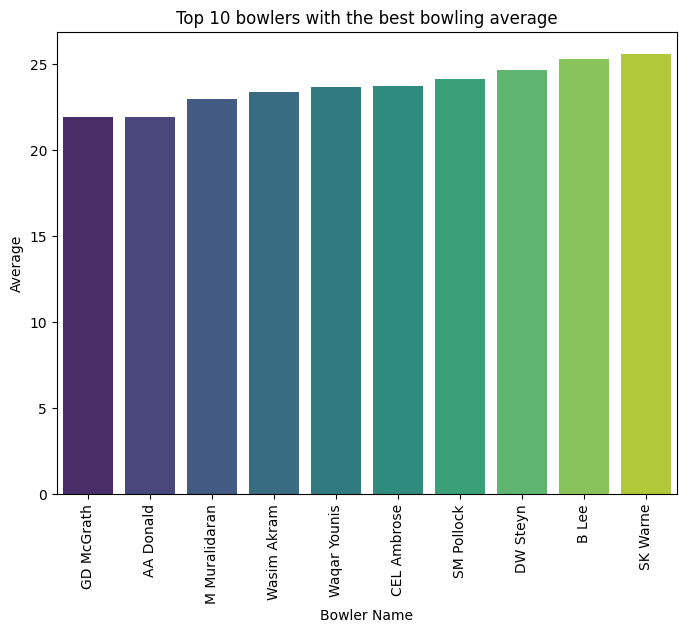

In [38]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Name', y='Overall_Average', data = best_aver, palette="viridis")
plt.title('Top 10 bowlers with the best bowling average')
plt.xlabel('Bowler Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [39]:
# all round performance track
all_round = pd.merge(bat, bowl, on='Name', how='inner')

In [40]:
perfo = all_round[(all_round['Total_Runs']>10000) & (all_round['Total_Wickets']>500)]

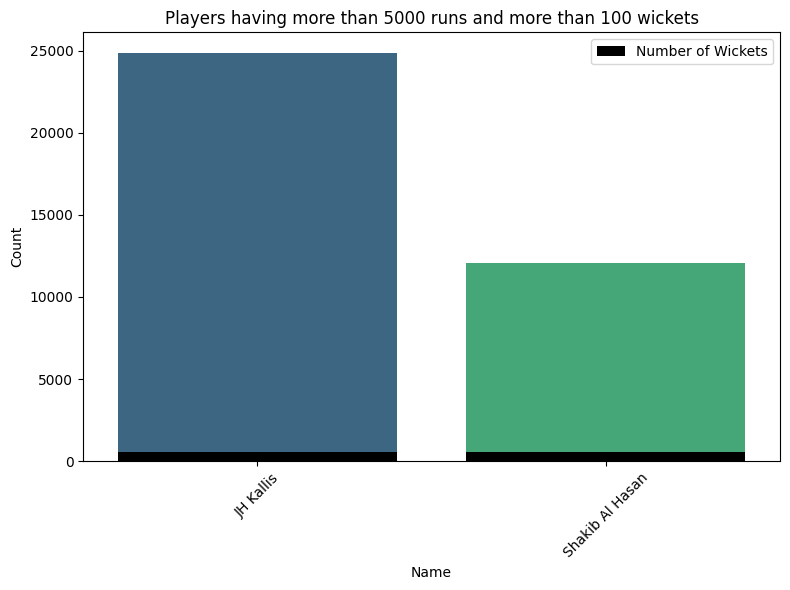

In [41]:
# Visualization plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and single subplot

# Plot the first bar chart
sns.barplot(x='Name', y="Total_Runs", data=perfo, ax=ax , palette="viridis")

# Plot the second bar chart on the same subplot with slight right shift
sns.barplot(x="Name", y="Total_Wickets", data=perfo, ax=ax, label="Number of Wickets", color='black')  # Adjust color as desired

# Adjust x-axis labels to avoid overlapping bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel("Name")
plt.ylabel("Count")
plt.title("Players having more than 5000 runs and more than 100 wickets")
plt.legend()  # Show legend for clarity
plt.tight_layout()  # Adjust spacing for readability

plt.show()

### All Time Best 11

##### I have selected all time best 11 players according to my personal interest and observation

Sachin Tendulkar remains my first choice due to his record of scoring the most runs and maintaining an excellent average. Brian Lara, considered to be the greatest batsman of all time, is also on my list. Jacques Kallis, regarded as the greatest all-rounder of all time, is my top pick for the all-rounder position. Adam Gilchrist, recognized as the most destructive and best wicket-keeper batsman of all time, is included in my selection. Ricky Ponting, renowned for his leadership, is appointed as the captain of my team. This selection is based on both personal opinion and informed suggestions.


- Sanath Jayasuriya (Left-hand Batsman)
- Virender Sehwag (Right-hand Batsman)
- Sachin Tendulkar (Right-hand Batsman) {Vice-Captain}
- Brian Lara (Left-hand Batsman)
- Ricky Ponting (Right-hand Batsman) {Captain}
- Adam Gilchrist (Left-hand Batsman) {WK}
- Jacques Kallis (Right-hand Batsman)(Right arm fast-medium)
- Shane Warne (Right-arm leg break)
- Brett Lee (Right arm fast)
- Wasim Akram (Left-arm fast)
- Muttiah Muralitharan (Right-arm off break)